In [1]:
# Importing libraries required for handling the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing metrics library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Importing libraries for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Importing library for splitting the data
from sklearn.model_selection import train_test_split

# Importing regression models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/Italy.csv")
df.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,PositionClass,Age_Ranges
0,G. Chiellini,33,Italy,89,89,27000000.0,215000.0,1841,Left,4.0,...,93.0,90.0,3.0,3.0,2.0,4.0,3.0,€44.6M,Defender,31-35
1,L. Insigne,27,Italy,88,88,62000000.0,165000.0,2017,Right,3.0,...,24.0,22.0,8.0,4.0,14.0,9.0,10.0,€105.4M,Attacker,26-30
2,G. Buffon,40,Italy,88,88,4000000.0,77000.0,1334,Right,4.0,...,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M,Goalkeeper,36-40
3,C. Immobile,28,Italy,87,87,52000000.0,115000.0,2009,Right,3.0,...,33.0,32.0,6.0,8.0,15.0,12.0,6.0,€88.4M,Attacker,26-30
4,M. Verratti,25,Italy,86,89,55000000.0,135000.0,2149,Right,3.0,...,83.0,80.0,12.0,12.0,15.0,15.0,10.0,€105.9M,Midfielder,22-25


In [3]:
df['Position'].value_counts()

GK     92
CM     90
CB     82
ST     72
LB     55
RB     38
LW     32
RM     27
LCB    27
CAM    25
RCB    24
RW     19
LCM    19
LM     18
RS     17
RCM    16
CDM    16
LS     16
CF      5
RDM     4
0       3
RWB     2
LDM     1
RF      1
LWB     1
Name: Position, dtype: int64

In [4]:
ageBins = [15, 21, 25, 30, 35, 40, 45]
ranges = ['16-21','22-25','26-30','31-35','36-40','41-45']
df['Age_Ranges'] = pd.cut(df['Age'], bins = ageBins, labels = ranges)
df['Age_Ranges'].value_counts()

26-30    225
22-25    200
16-21    145
31-35    110
36-40     22
41-45      0
Name: Age_Ranges, dtype: int64

In [5]:
maxEarners= df[['Name','Value', 'Wage']].nlargest(11,'Wage', keep = 'first')
maxEarners = maxEarners.set_index('Name')
maxEarners.head()

,Value,Wage
Name,,
G. Chiellini,27000000.0,215000.0
L. Insigne,62000000.0,165000.0
L. Bonucci,30000000.0,160000.0
Jorginho,38000000.0,155000.0
M. Verratti,55000000.0,135000.0


Text(0, 0.5, 'Wage')

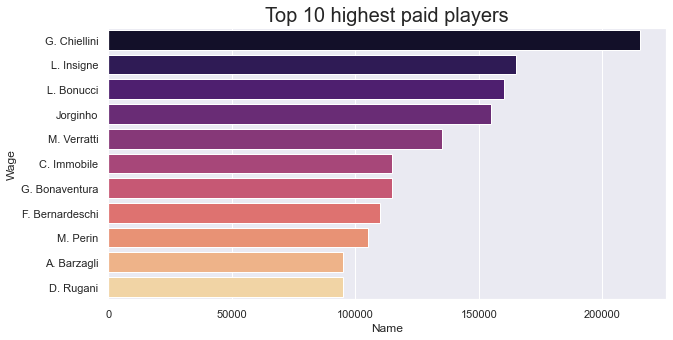

In [6]:
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(x = maxEarners['Wage'], y = maxEarners.index,  palette = 'magma')
plt.title('Top 10 highest paid players', fontsize = 20)
plt.xlabel('Name', fontsize =12)
plt.ylabel('Wage', fontsize =12)

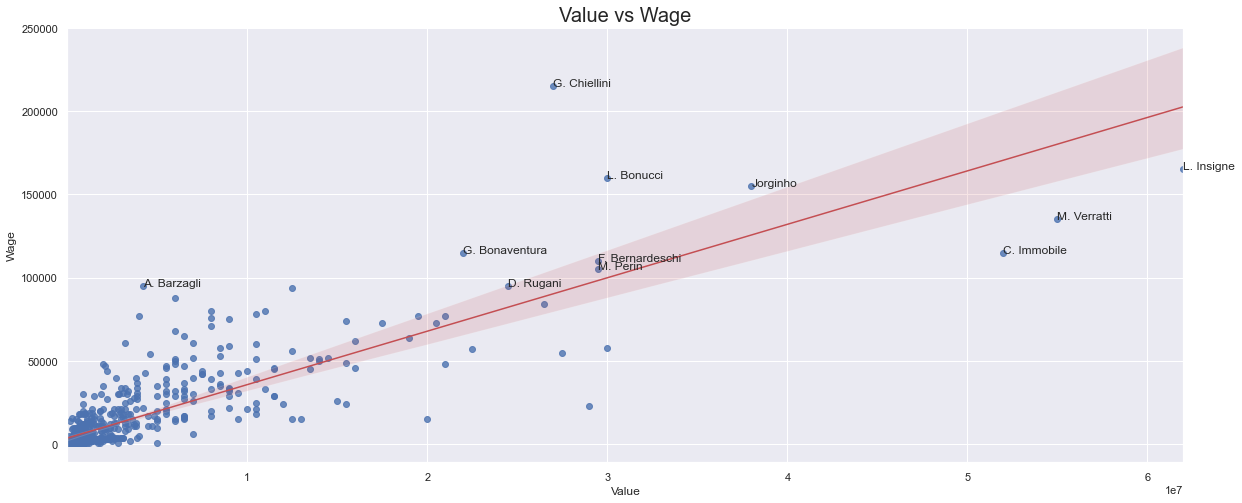

In [7]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.regplot(x = 'Value', y = 'Wage' , data = df,
            line_kws={"color":"r","alpha":1,"lw":1.5})
plt.title('Value vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (maxEarners['Value'][i],maxEarners['Wage'][i]))

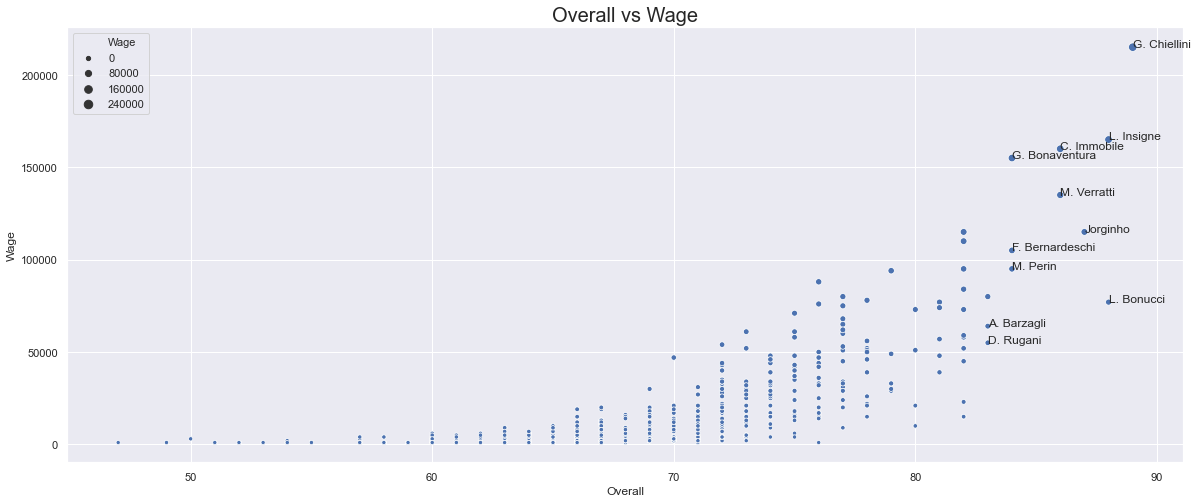

In [8]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Overall', y = 'Wage' , data = df, size='Wage')
plt.title('Overall vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (df['Overall'][i],df['Wage'][i]))

Text(0.5, 1.0, 'Wage vs Position Class')

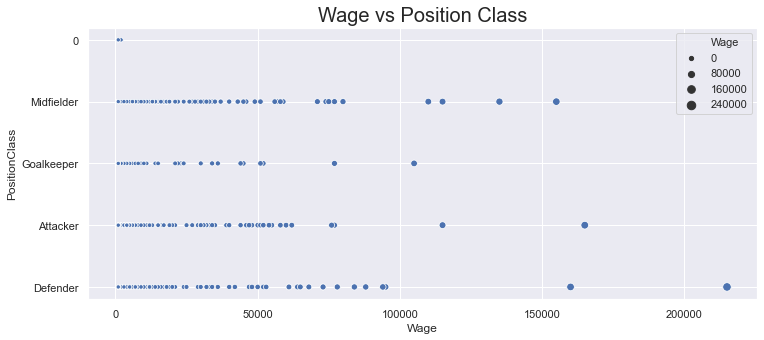

In [9]:
plt.figure(figsize=(12,5))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Wage', y = 'PositionClass' , data = df,size='Wage')
plt.title('Wage vs Position Class', fontsize = 20)

In [10]:
cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Skill Moves','Dribbling', 'Curve',
      'FKAccuracy', 'LongPassing', 'BallControl', 'Agility', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
      'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Reactions', 'Aggression',
      'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle',
      'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(cols):
    print('Best {0} : {1}'.format(cols[i],df.loc[df[cols[i]].idxmax()][0]))
    i += 1

Best Crossing : L. Insigne
Best Finishing : C. Immobile
Best HeadingAccuracy : L. Pavoletti
Best ShortPassing : M. Verratti
Best Volleys : C. Immobile
Best Skill Moves : F. Bernardeschi
Best Dribbling : L. Insigne
Best Curve : S. Giovinco
Best FKAccuracy : S. Giovinco
Best LongPassing : M. Verratti
Best BallControl : L. Insigne
Best Agility : C. Galano
Best Acceleration : L. Insigne
Best SprintSpeed : C. Galano
Best Agility : C. Galano
Best Reactions : C. Immobile
Best Balance : M. Verratti
Best ShotPower : M. Balotelli
Best Jumping : G. Pazzini
Best Stamina : J. Dezi
Best Strength : A. Cerri
Best LongShots : F. Quagliarella
Best Reactions : C. Immobile
Best Aggression : G. Chiellini
Best Interceptions : L. Bonucci
Best Positioning : C. Immobile
Best Vision : L. Insigne
Best Penalties : M. Balotelli
Best Composure : M. Verratti
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : G. Chiellini
Best GKDiving : G. Buffon
Best GKHandling : G. Buffon
Best GKKic

In [12]:
target = "Overall"
predictors = list(df.columns)
for r in [target,"Name","Age","Nationality","Position","Weak Foot","Preferred Foot", "Work Rate"]:
  predictors.remove(r)
#print(target,predictors)

In [13]:
def numColumns(col):
    if type(list(df[col])[0]) == float:
        return col

numberPreds = []

for c in df.columns:
    temp = numColumns(c)
    if temp != None:
        numberPreds.append(temp)

#numberPreds

In [14]:
scaler = StandardScaler()
numberPreds.append(target)
# print(predictors,target)
scaled_df = pd.DataFrame(data=scaler.fit_transform(df[numberPreds]),columns=numberPreds)

numberPreds.remove(target)

X = scaled_df[numberPreds]
y = scaled_df[target]

print(X.shape,y.shape)

(702, 40) (702,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state= 1)
mlpReg = MLPRegressor(max_iter=220,verbose=1)
mlpReg.fit(X_train.values,y_train.values)

Iteration 1, loss = 0.72293310
Iteration 2, loss = 0.48103290
Iteration 3, loss = 0.33900412
Iteration 4, loss = 0.27741579
Iteration 5, loss = 0.24637621
Iteration 6, loss = 0.22063467
Iteration 7, loss = 0.19100548
Iteration 8, loss = 0.16969067
Iteration 9, loss = 0.15939237
Iteration 10, loss = 0.14828364
Iteration 11, loss = 0.14067256
Iteration 12, loss = 0.13088307
Iteration 13, loss = 0.12167407
Iteration 14, loss = 0.11426288
Iteration 15, loss = 0.10832469
Iteration 16, loss = 0.10220202
Iteration 17, loss = 0.09616953
Iteration 18, loss = 0.09148318
Iteration 19, loss = 0.08755263
Iteration 20, loss = 0.08366793
Iteration 21, loss = 0.08036710
Iteration 22, loss = 0.07723349
Iteration 23, loss = 0.07424651
Iteration 24, loss = 0.07109179
Iteration 25, loss = 0.06844223
Iteration 26, loss = 0.06648096
Iteration 27, loss = 0.06403441
Iteration 28, loss = 0.06185634
Iteration 29, loss = 0.06014730
Iteration 30, loss = 0.05868310
Iteration 31, loss = 0.05694754
Iteration 32, los

MLPRegressor(max_iter=220, verbose=1)

In [17]:
preds = mlpReg.predict(X_test)
score = r2_score(y_test,preds)
print(score)

0.9282046006344798


In [18]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
preds_lr = lr.predict(X_test)
score_lr = r2_score(y_test,preds_lr)
print(score_lr)

0.8008353143003185
